# State-Space Models:  Learning the Kalman Filter

## Translating Equations

In [19]:
from pathlib import Path
from IPython.display import Image

Recently, [Mamba](https://arxiv.org/abs/2312.00752) has provoked a lot of 
[excited discussion](https://www.deeplearning.ai/the-batch/issue-244/) about 
potentially supplanting [Transformer-based architectures](
https://en.wikipedia.org/wiki/Transformer_(deep_learning_architecture)) for [
large language models](https://en.wikipedia.org/wiki/Large_language_model).  
Mamba is merely one of a large class of [state-space models](
https://probml.github.io/ssm-book/chapters/ssm/ssm_intro.html), which have
demonstrated utility in modeling not only language but also [gene expression](
https://doi.org/10.1093/bioinformatics/bth093), [neural activity](
https://doi.org/10.1007/s10827-009-0179-x), [animal movement](
https://doi.org/10.1016/j.tree.2007.10.009), and [macroeconomic](
https://doi.org/10.1111/joes.12405) and [other time series](
https://www.google.com/books/edition/Time_Series_Analysis_by_State_Space_Meth/lGyshsfkLrIC).

While I've read [plenty](
https://huggingface.co/blog/lbourdois/get-on-the-ssm-train) [of](
https://newsletter.maartengrootendorst.com/p/a-visual-guide-to-mamba-and-state) 
[articles]( https://cnichkawde.github.io/statespacesequencemodels.html) [
explaining](https://srush.github.io/annotated-mamba/hard.html) [Mamba's](
https://jackcook.com/2024/02/23/mamba.html) [architecture](
https://jameschen.io/jekyll/update/2024/02/12/mamba.html), I wanted to dive 
deeper into the basics of state-space models, which inevitably led me to 
[Kalman filters](https://en.wikipedia.org/wiki/Kalman_filter).  However, I found
various sources confusing because they used different notation in specifying the
filter's equations.  The [control](https://en.wikipedia.org/wiki/Control_system) 
research literature uses one set of variable names, while the statistical [time
series](https://en.wikipedia.org/wiki/Time_series) literature uses another set. 
To reconcile these for my own understanding, I created a table of 
correspondences.  My two main sources were:

- [Kalman and Bayesian Filters in Python, 2020](
    https://rlabbe.github.io/Kalman-and-Bayesian-Filters-in-Python/)
    > Roger R Labbe Jr

- [Time Series Analysis by State Space Methods, 2nd Edition, 2012](
    https://www.google.com/books/edition/Time_Series_Analysis_by_State_Space_Meth/lGyshsfkLrIC)
    > J. Durbin, S.J. Koopman

First, the Kalman filter equations as they appear in Labbe (2020) Chapter 6:

$$
\begin{aligned}
\mathbf{\bar x} &= \mathbf{F x} + \mathbf{B u} \\
\mathbf{\bar P} &= \mathbf{FP{F}}^\mathsf T + \mathbf Q \\
\\
\textbf{S} &= \mathbf{H\bar PH}^\mathsf T + \mathbf R \\
\mathbf K &= \mathbf{\bar PH}^\mathsf T \mathbf{S}^{-1} \\
\textbf{y} &= \mathbf z - \mathbf{H \bar x} \\
\mathbf x &=\mathbf{\bar x} +\mathbf{K\textbf{y}} \\
\mathbf P &= (\mathbf{I}-\mathbf{KH})\mathbf{\bar P}
\end{aligned}
$$

Second, the equations from Durbin and Koopman (2012), (4.24) on page 85, but in the same order as above:

$$ a_{t+1} = T_t a_t + K_t v_t $$
$$ P_{t+1} = T_t P_t (T_t - K_t Z_t)' + R_t Q_t R_t' $$
\\
$$ F_t = Z_t P_t Z_t' + H_t $$
$$ K_t = T_t P_t Z_t' F_t^{-1} $$
$$ v_t = y_t - Z_t a_t $$
$$ a_{t|t} = a_t + P_t Z_t' F_t^{-1} v_t $$
$$ P_{t|t} = P_t - P_t Z_t' F_t^{-1} Z_t P_t $$

Now, the table specifying how the variables correspond:

| Labbe (2020) | Durbin and Koopman (2012) | Terminology |
| -- | -- | -- |
| $\mathbf x$ | $$a_t$$ | state estimate |
| $\mathbf {\bar x}$ | $$a_{t+1}$$ | predicted state at next time step |
| $\mathbf F$ | $$T_t$$ | process model / state transition matrix |
| $\mathbf B$ | $$omitted$$ | control input model / control function |
| $\mathbf u$ | $$omitted$$ | control input |
| $\mathbf P$ | $$P_t$$ | state covariance estimate |
| $\mathbf {\bar P}$ | $$P_{t+1}$$ | predicted state covariance at next time step |
| $$omitted$$ | $$R_t$$ | selection matrix |
| $\mathbf Q$ | $$Q_t$$ | process noise / state disturbance covariance matrix |
| $\mathbf S$ | $$F_t$$ | system uncertainty / innovation covariance |
| $\mathbf H$ | $$Z_t$$ | measurement function / design matrix |
| $\mathbf R$ | $$H_t$$ | measurement noise / observation disturbance covariance matrix |
| $\mathbf K$ | $$K_t$$ | Kalman gain / scaling factor |
| $\mathbf z$ | $$y_t$$ | measurement / observation / data point |
| $\mathbf y$ | $$v_t$$ | residual between predicted state and measurement |
| $\mathbf x$ | $$a_{t|t}$$ | updated state estimate |
| $\mathbf P$ | $$P_{t|t}$$ | updated state covariance estimate |

## Testing Implementation Code

In addition to the table above, I coded the Kalman filter in both sets of 
notation and tested both on several examples of input data, parameters, and 
results from various sources to verify that the implementation was correct.  The
two versions in Python/[NumPy](https://numpy.org/) are below:

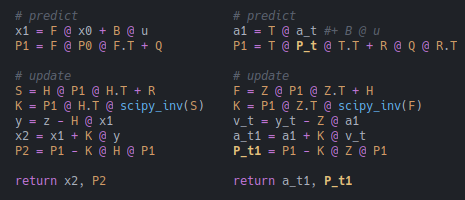

In [20]:
filepath = Path.cwd().parent / 'output' / 'kalman_code.png'
Image(filename=filepath, width=640)

Go [here](
https://github.com/afairless/kalman_filter/blob/main/src/kalman_filter.py) for 
the full code.

The [tested examples](
https://github.com/afairless/kalman_filter/blob/main/tests/test_kalman_filter.py) 
came from:

- [Kalman Filter For Dummies, 2009](
    http://bilgin.esme.org/BitsAndBytes/KalmanFilterforDummies)
    > Bilgin Esme

- [Kalman and Bayesian Filters in Python, 2020](
    https://rlabbe.github.io/Kalman-and-Bayesian-Filters-in-Python/)
    > Roger R Labbe Jr

- [Time Series Analysis by State Space Methods, 2nd Edition, 2012](
    https://www.google.com/books/edition/Time_Series_Analysis_by_State_Space_Meth/lGyshsfkLrIC)
    > J. Durbin, S.J. Koopman

The [Durbin and Koopman (2012)](
https://www.google.com/books/edition/Time_Series_Analysis_by_State_Space_Meth/lGyshsfkLrIC) 
example using the classic Nile River data set didn't provide exact numbers for 
its results, but the results do appear in plots in Figure 2.1 on page 16.  The 
plots that I obtained appear to match their plots very closely.

First, the data points and the filtered state shown in Figure 2.1 (i):

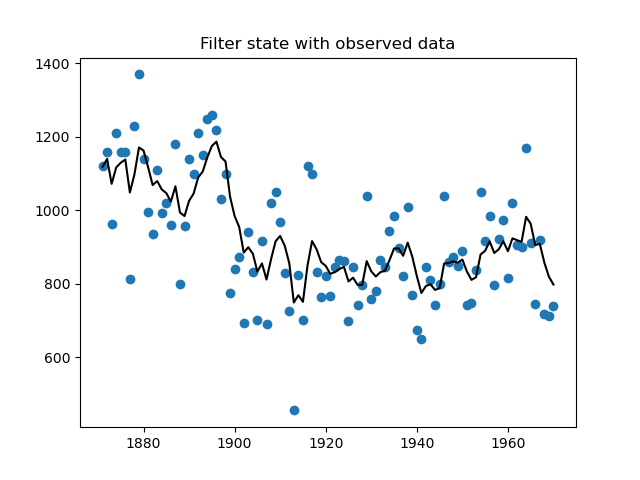

In [21]:
filepath = Path.cwd().parent / 'output' / 'filter_state_with_data.png'
Image(filename=filepath, width=640)

Second, the filter variance shown in Figure 2.1 (ii):

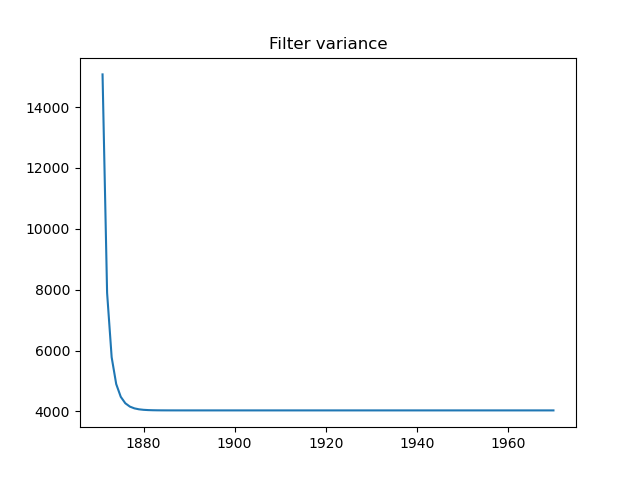

In [22]:
filepath = Path.cwd().parent / 'output' / 'filter_variance.png'
Image(filename=filepath, width=640)

Finally, the residuals shown in Figure 2.1 (iii):

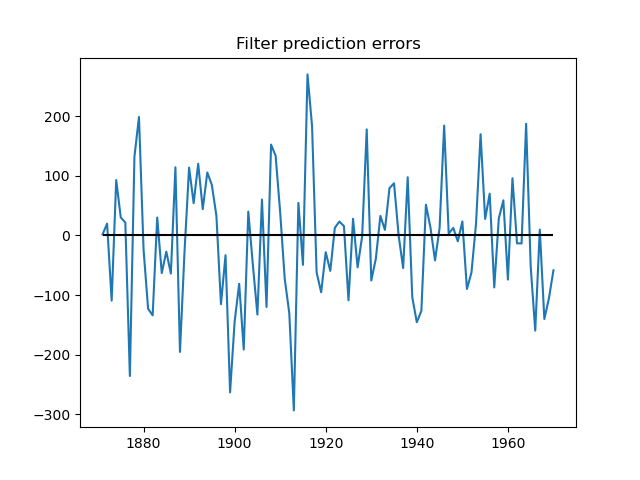

In [23]:
filepath = Path.cwd().parent / 'output' / 'prediction_errors.png'
Image(filename=filepath, width=640)